# 📚 Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 📁 Dataset

In [6]:
df=pd.read_csv("/kaggle/input/iris/Iris.csv")

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.drop('Id', axis=1, inplace=True)

df.rename(columns={
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'species'
}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.shape

(150, 5)

In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


# 📈 Pie Chart

<Axes: ylabel='species'>

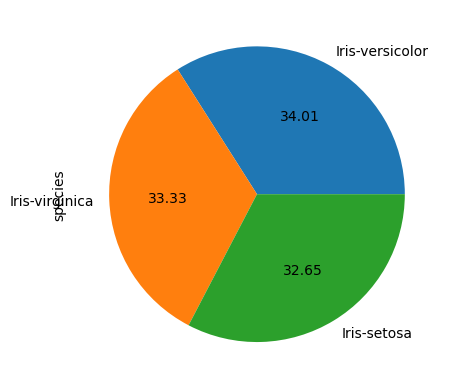

In [17]:
df['species'].value_counts().plot(kind='pie', autopct = '%.2f')

# 📊 Distribution Plot

<Axes: xlabel='sepal_width', ylabel='Density'>

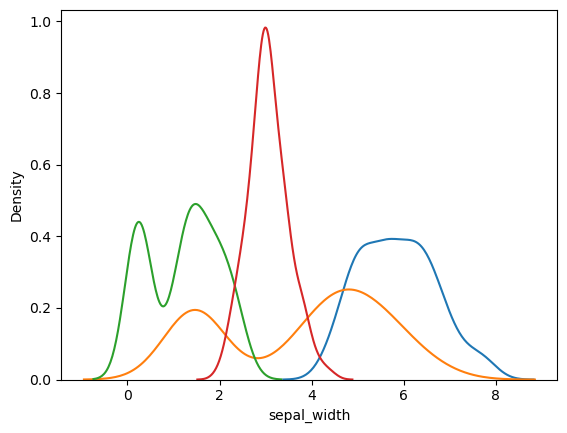

In [18]:
sns.distplot(df["sepal_length"],hist=False)
sns.distplot(df["petal_length"],hist=False)
sns.distplot(df["petal_width"],hist=False)
sns.distplot(df["sepal_width"],hist=False)


# 📉 Joint Plot

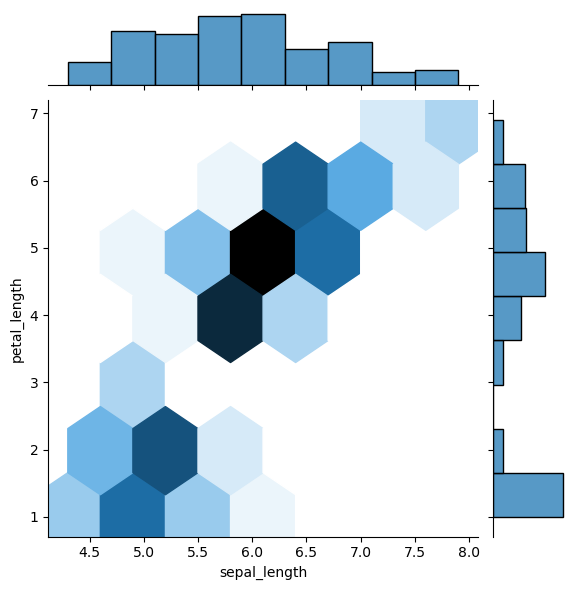

In [19]:
sns.jointplot(x=df['sepal_length'],y=df['petal_length'],data=df,kind='hex')


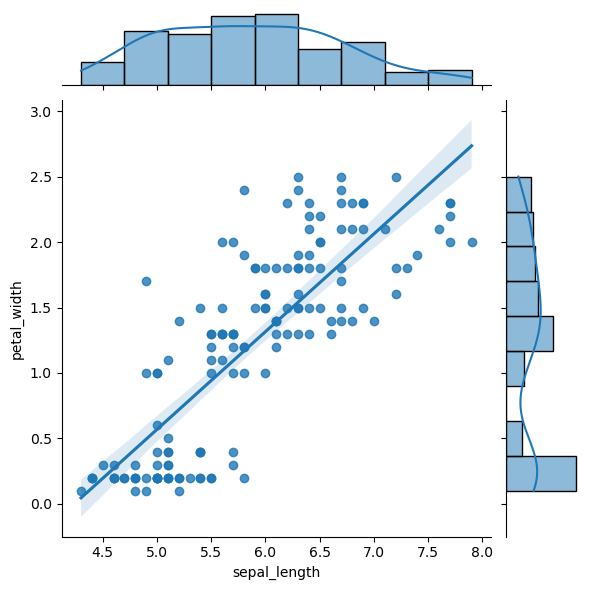

In [20]:
sns.jointplot(x='sepal_length',y='petal_width',data=df,kind='reg')

# 📊 Pair Plot

<Figure size 640x480 with 0 Axes>

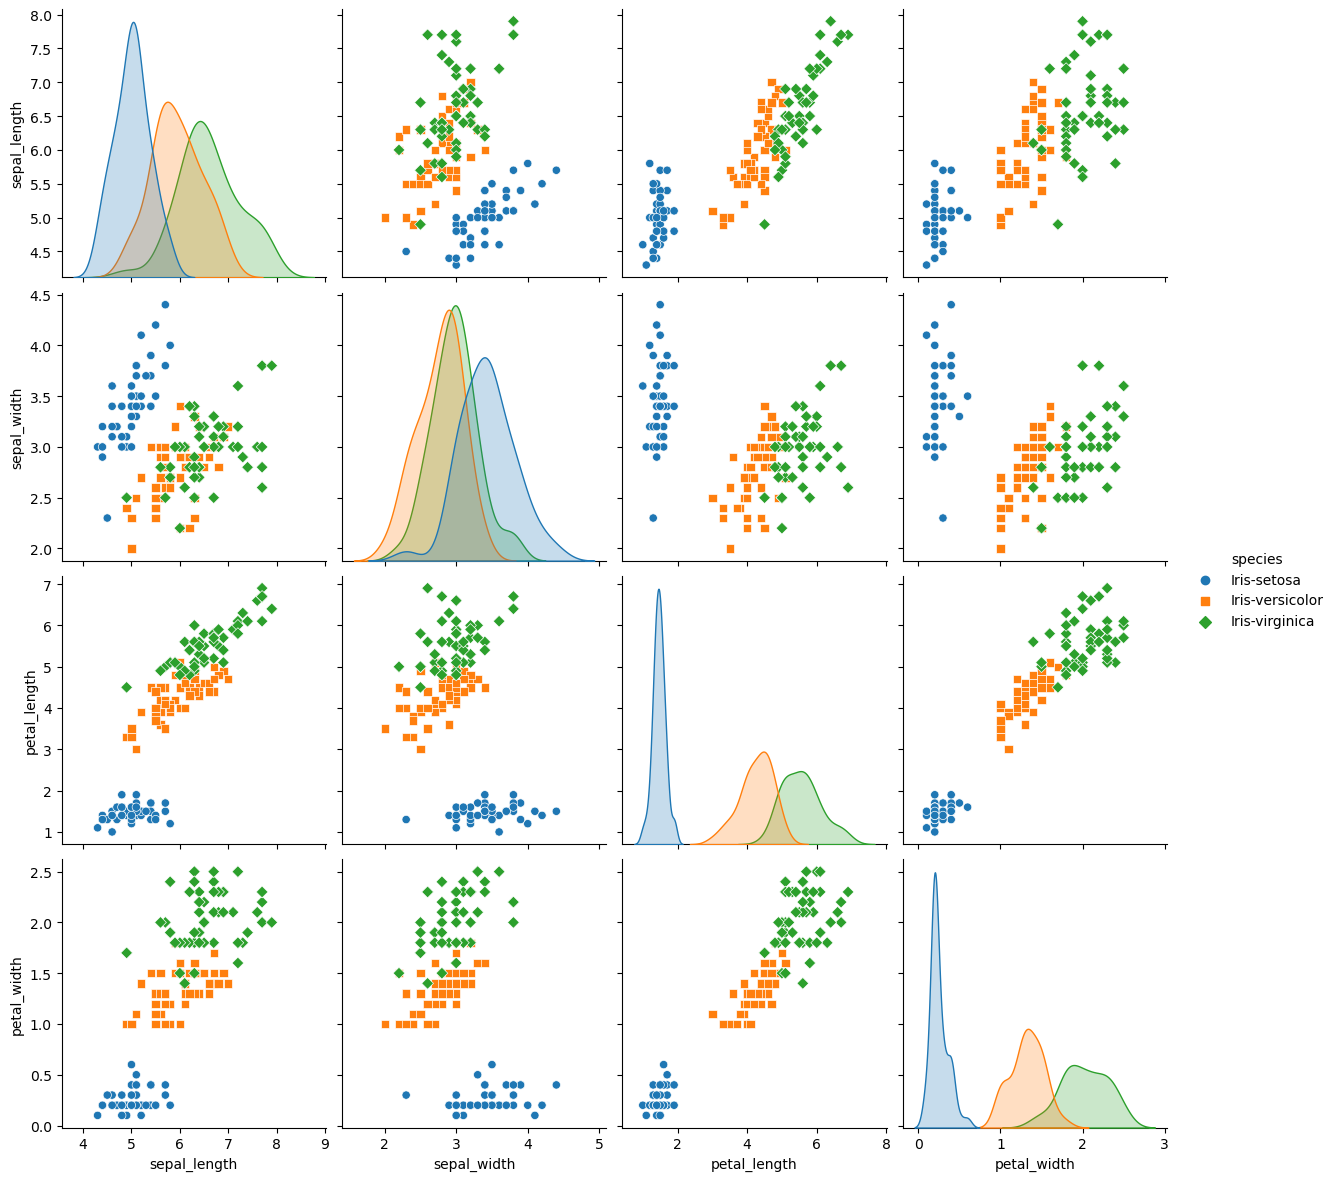

In [21]:
plt.figure()

sns.pairplot(df, hue = "species", size=3, markers=["o", "s", "D"])


# 📦 Box Plot

<Axes: >

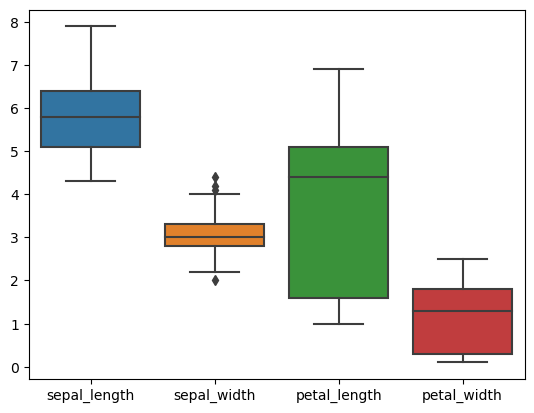

In [22]:
sns.boxplot(data=df)

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

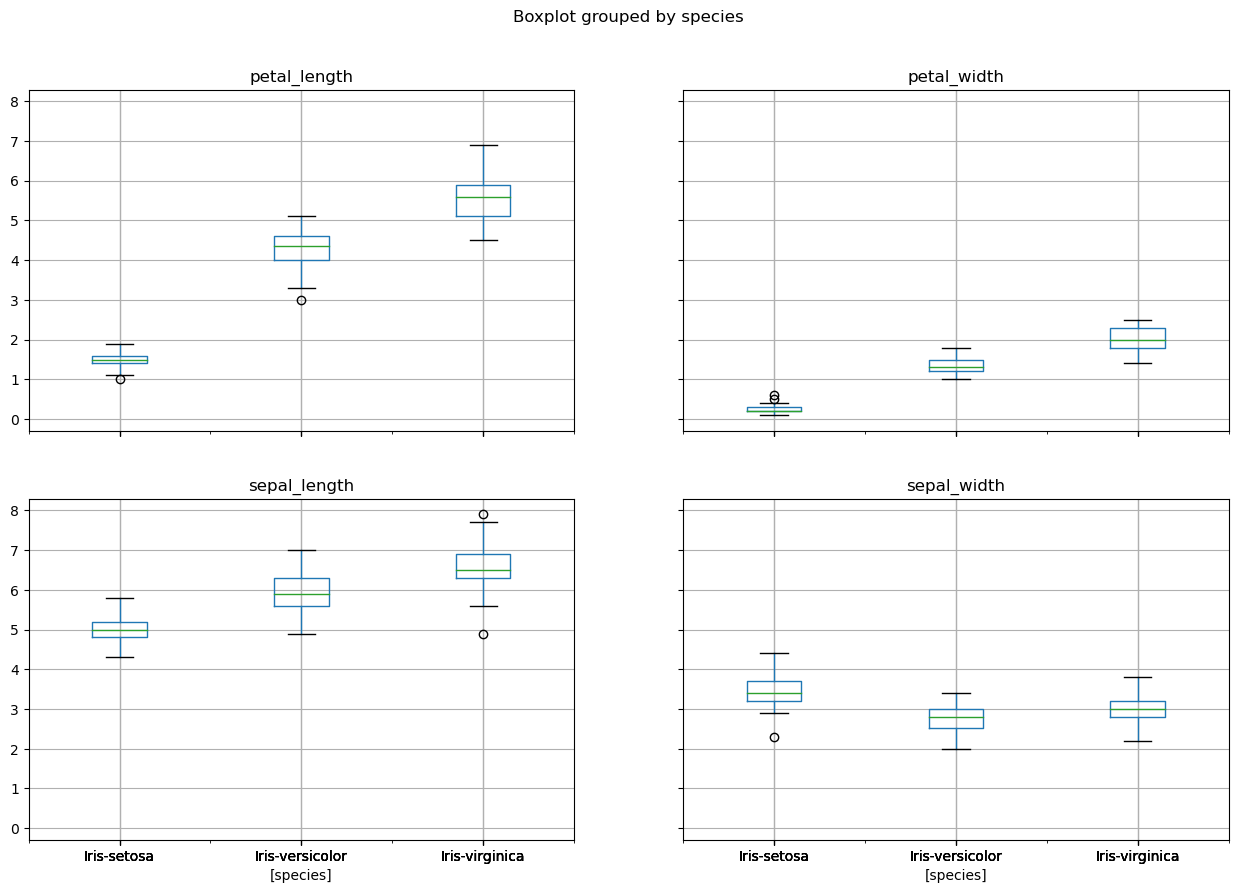

In [23]:
df.boxplot(by="species", figsize=(15, 10))


# 🎨 Plotly: 3D Plot



In [24]:
import plotly.express as px

fig = px.scatter_3d(df, x="sepal_length", y="petal_length", z="petal_width", color="species", color_continuous_scale="Spectral")
fig.show()

# 📐 Feature Scaling



In [25]:
feature = ["sepal_length","sepal_width","petal_length","petal_width"]
X = df[feature].values
y = df['species'].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 🏷️ Label Encoder



In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [28]:
y = le.transform(y)

# 📏 Standard Scaler



In [29]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [30]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🏋️ Model Training



In [31]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# 📈 Logistic Regression



In [32]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [33]:
model_pred = model.predict(X_test_scaled)

In [34]:
accuracy_score(model_pred, y_test)

0.9666666666666667

# 📈 K-Nearest Neighbors (KNN)



In [35]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
clf_pred = clf.predict(X_test_scaled)

In [37]:
accuracy_score(y_test,clf_pred)

0.9666666666666667

# 📈 Support Vector Classifier (SVC)



In [38]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled,y_train)

SVC()

In [39]:
svc_pred = svc.predict(X_test_scaled)

In [40]:
accuracy_score(y_test,svc_pred)

0.9666666666666667

# 📈 Naive Bayes



In [41]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled,y_train)

GaussianNB()

In [42]:
nb_pred = nb.predict(X_test_scaled)

In [43]:
accuracy_score(y_test,nb_pred)

0.9666666666666667

# 📊 Model Evaluation



## 📊 Confusion Matrix



In [44]:
confusion_matrix(y_test, model_pred)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]])

In [45]:
confusion_matrix(y_test, clf_pred)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]])

In [46]:
confusion_matrix(y_test, svc_pred)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]])

In [47]:
confusion_matrix(y_test, nb_pred)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]])

# 📈 All Model Scores



In [48]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','SVM', 'KNN','Naive Bayes'],
    'Score': [0.96,0.96,0.96,0.96]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.96,Logistic Regression
0.96,SVM
0.96,KNN
0.96,Naive Bayes


# 🎯 My Model Predictions



In [49]:
model_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [50]:
clf_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [51]:
svc_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [52]:
nb_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype='<U15')